# Import necessary libraries


In [39]:
%matplotlib inline
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set_theme()
import statsmodels.formula.api as smf
import statsmodels.api as sm 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


# Import data

In [11]:

# dataset : housesalesprediction from kaggle
df = pd.read_csv('data/house_data_washington.csv')

# Observe data

In [12]:
print(df.dtypes)

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
df.head()
print(df.date)
print(type(df.iloc[0]))

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object
<class 'pandas.core.series.Series'>


We need to make date format more friendly for computer. So let extract year and month from the string and create new features 'sales_year' and 'sales_month' in df.  
And we observe the changes in the dataframe with `groupby`.  

In [15]:
df['sales_year'] = df.date.apply(lambda x: int(x[:4]))
df['sales_month'] = df.date.apply(lambda x: int(x[4:6]))
df['sales_year_month'] = df.date.apply(lambda x: int(x[:6]))

df.groupby('sales_year')
df.groupby('sales_month')
df.groupby('sales_year_month')

In [16]:
print(df.groupby('sales_year')['id'].count())
print(df.groupby('sales_month')['id'].count())

monthly_sales = df.groupby('sales_year_month')['id'].count()
print(monthly_sales)

sales_year
2014    14633
2015     6980
Name: id, dtype: int64
sales_month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64
sales_year_month
201405    1768
201406    2180
201407    2211
201408    1940
201409    1774
201410    1878
201411    1411
201412    1471
201501     978
201502    1250
201503    1875
201504    2231
201505     646
Name: id, dtype: int64


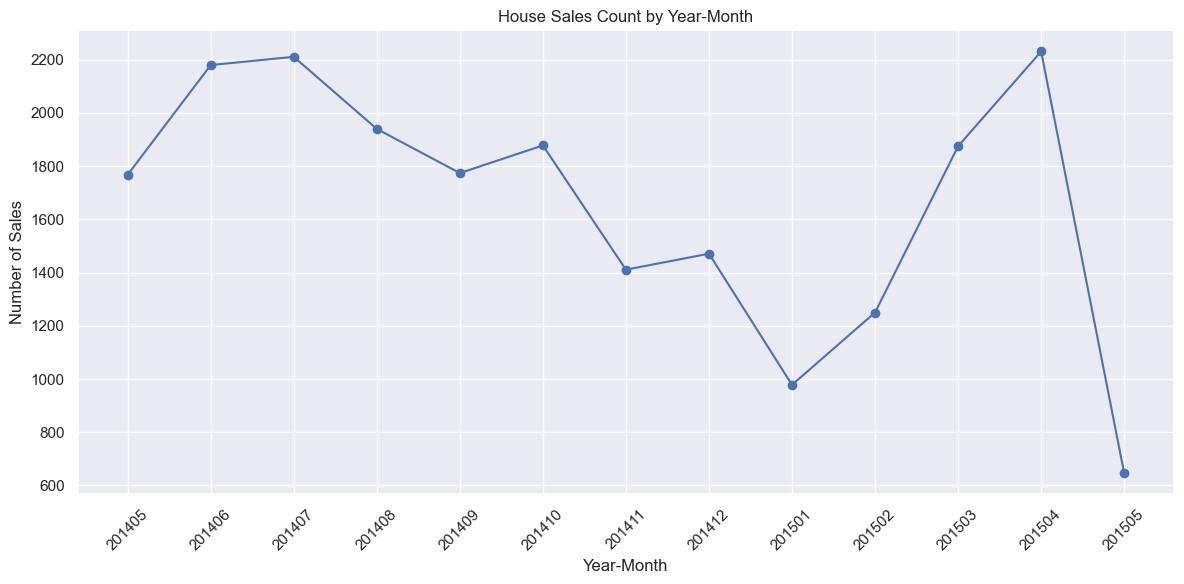

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.title('House Sales Count by Year-Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# Think about the data
Based on the new features 'sales_year' and 'sales_month', what insights can we gain about the sales trends over time?
1. Which month has the most number of sales?    
2. Which months has the least number of sales?

# Drop data
Because there are some unneeded columns in the dataframe, we will drop them to simplify our analysis. And date has been converted to a more usable format, we can drop the original 'date' column. As same as `zipcode`, `lat`, `long`, `id`.  

In [19]:
df = df.drop(['date', 'zipcode', 'id', 'lat', 'long'], axis = 1)

# Correlation analysis and visualization
We want to know which features are most correlated with sales. This can help us identify key factors that influence sales performance.

In [20]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sales_year,sales_month,sales_year_month
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447,0.003576,-0.010081,0.003061
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244,-0.009838,-0.001533,-0.010477
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175,-0.026596,0.007392,-0.027513
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286,-0.029038,0.011810,-0.029777
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557,0.005468,-0.002369,0.005597
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269,-0.022315,0.014005,-0.022536
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703,-0.004165,0.008132,-0.003819
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575,0.001364,-0.005638,0.001042
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406,-0.045589,0.021978,-0.046507
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248,-0.030387,0.008376,-0.031439


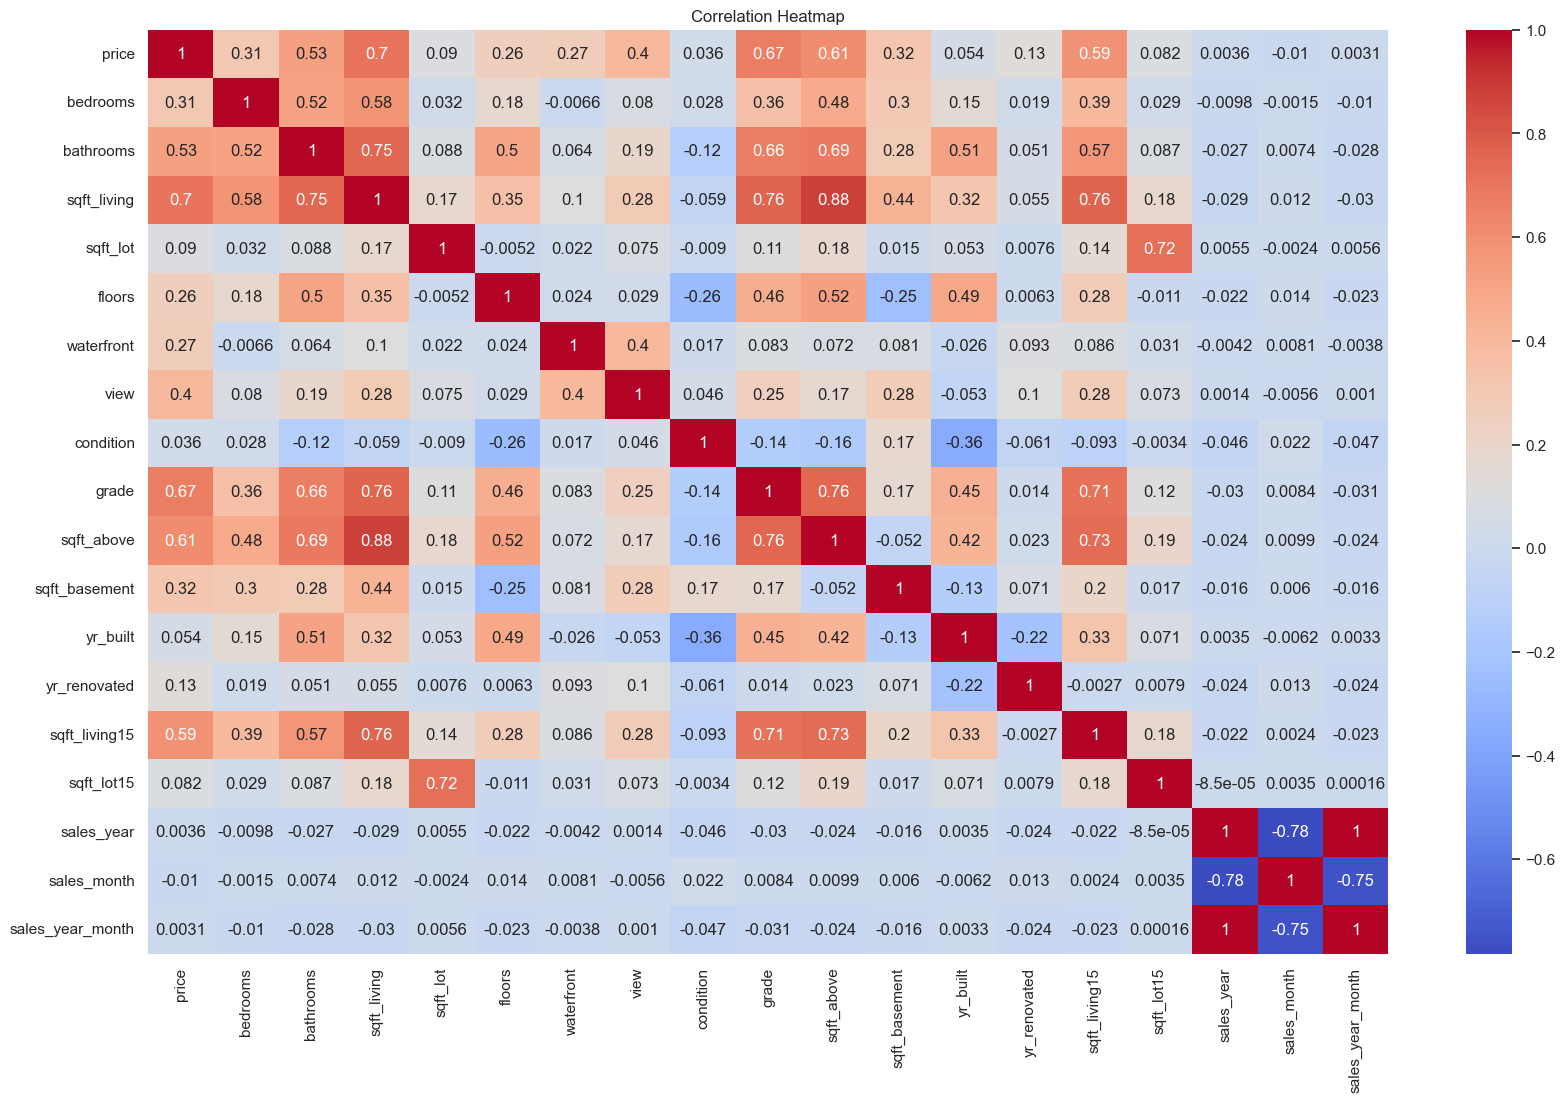

In [22]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


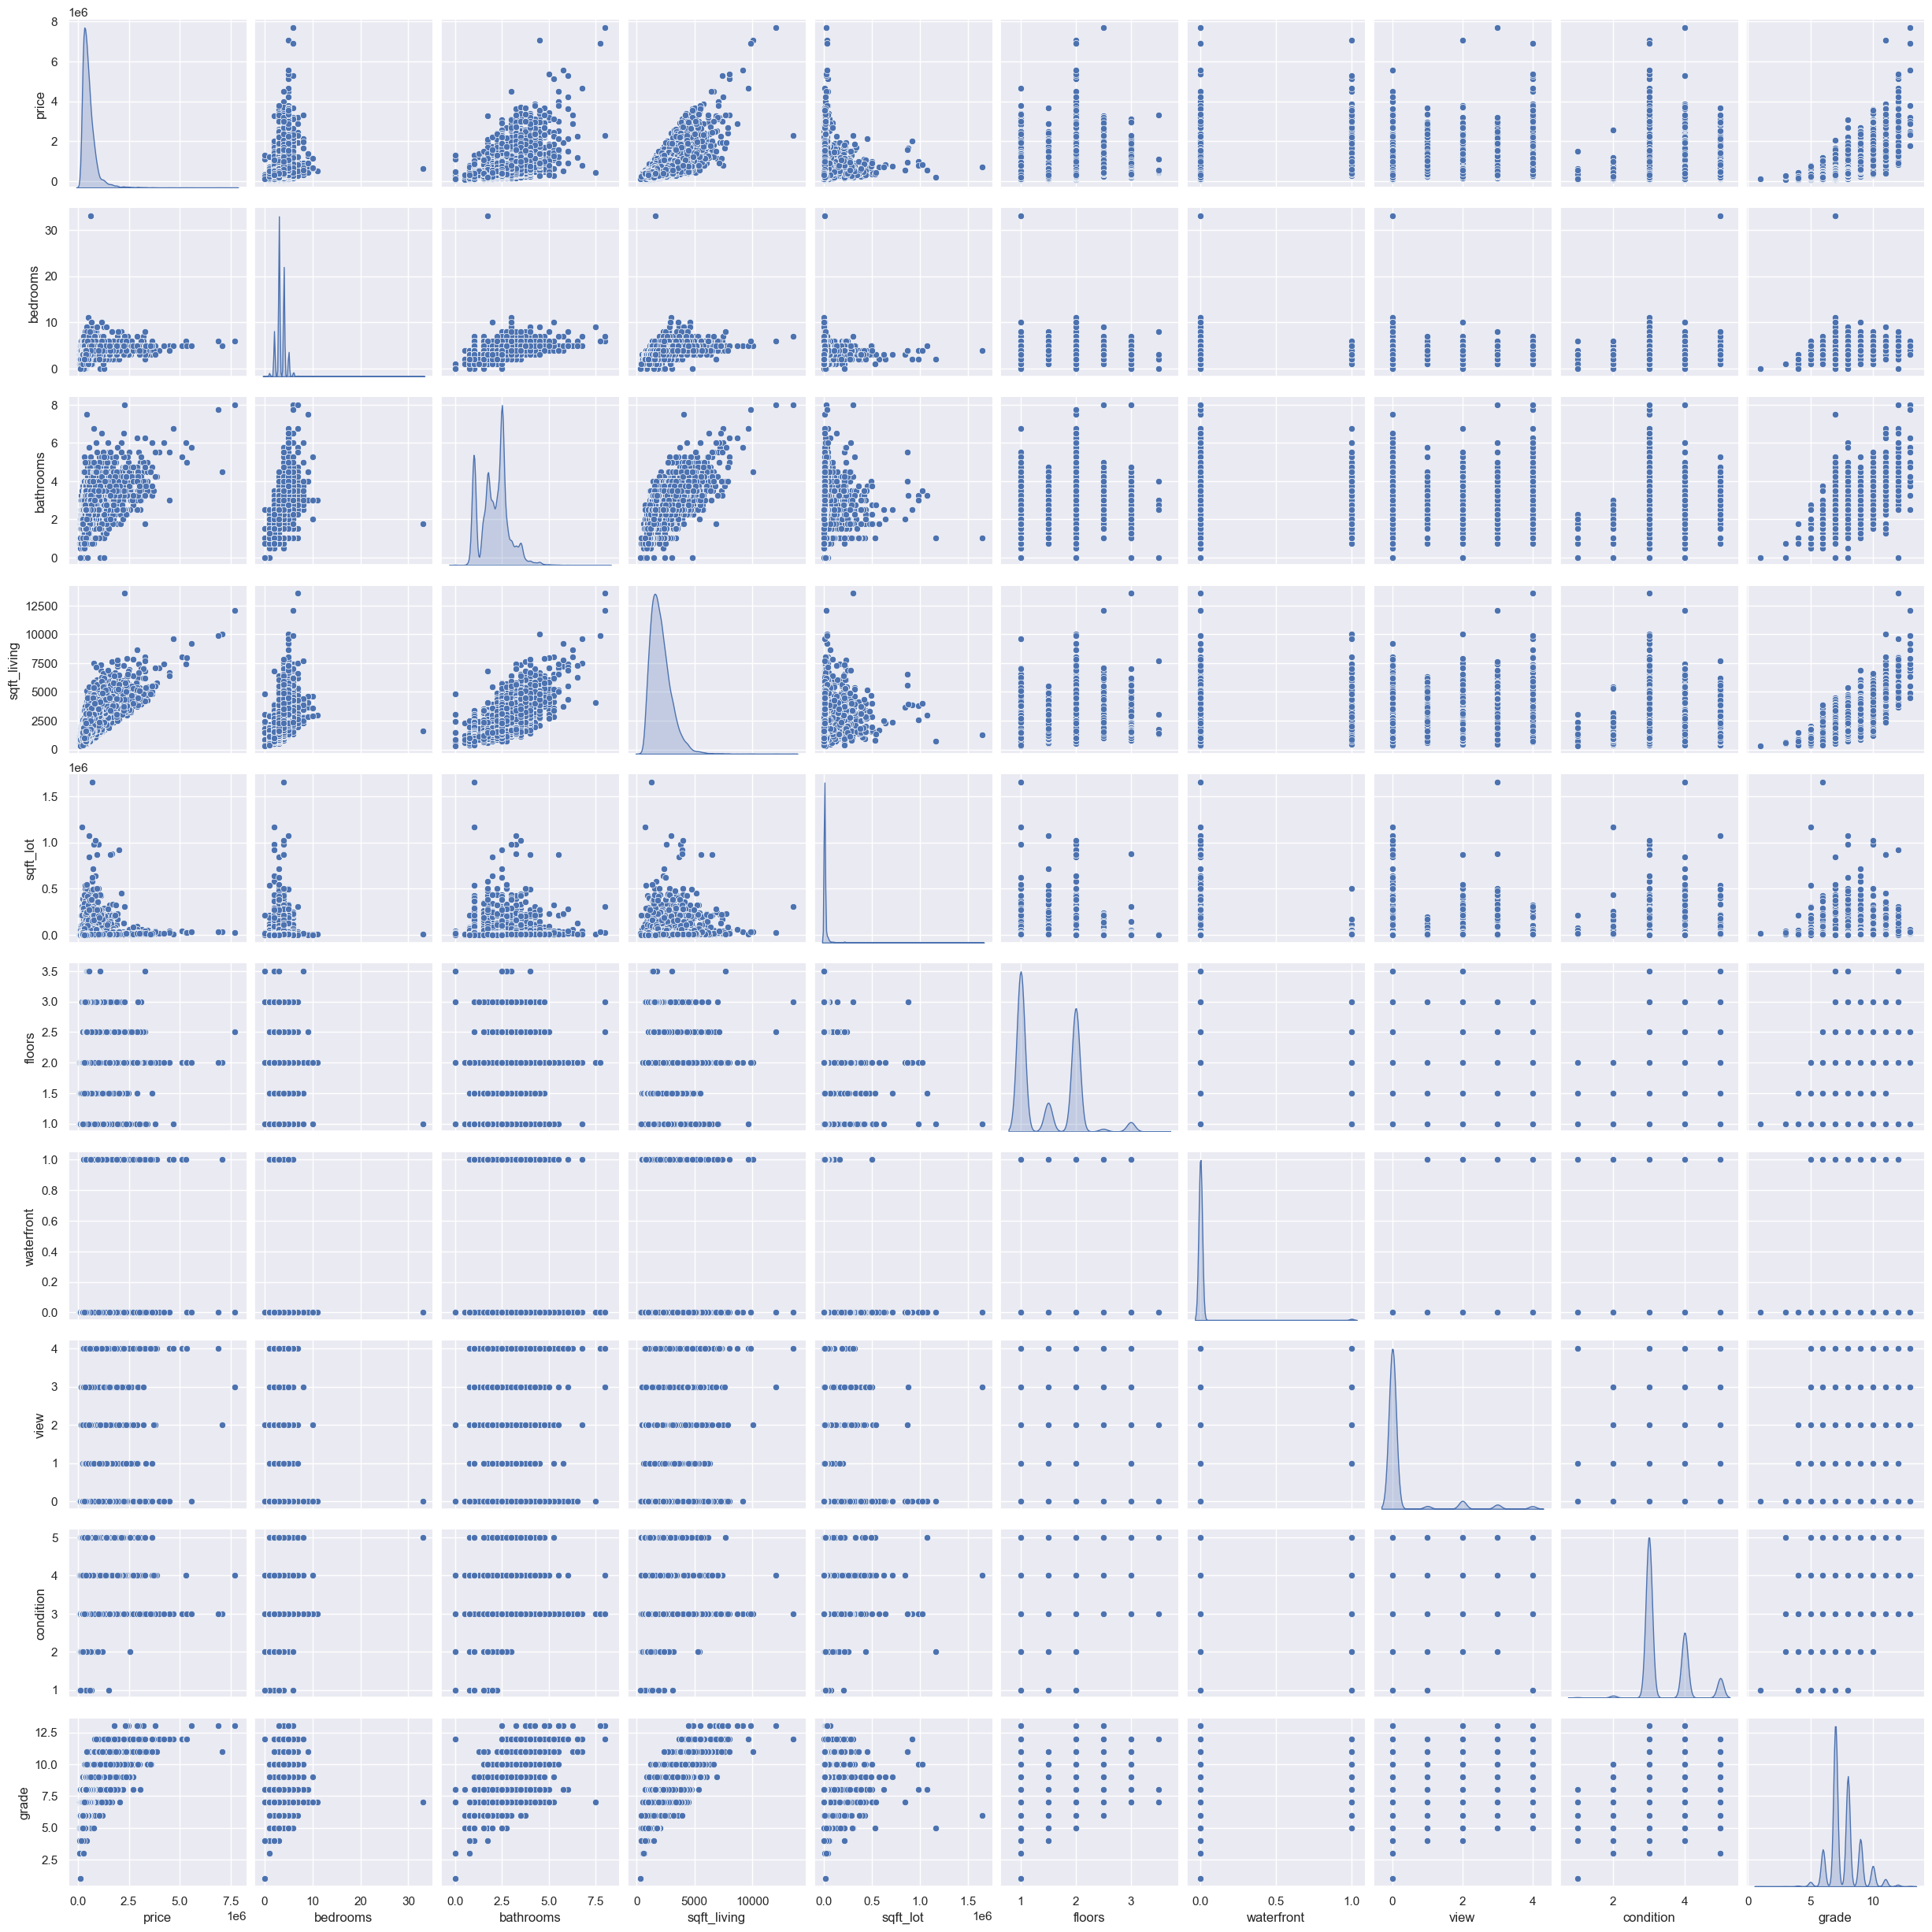

In [24]:
selected_columns = df.columns[:10]
df_subset = df[selected_columns]

# pairplot，diagonal to KDE
sns.pairplot(df_subset, diag_kind='kde')

plt.show()

We found that `sqft_living`, `grade`, `sqft_above`, `sqft_living15` are positively correlated with `price`. This means that as these features increase, the price of the house tends to increase as well.  
We will use these features to build our linear regression model.

# Linear Regression
In this section, we will build a linear regression model using the selected features to predict house prices.

In [36]:
import numpy as np

class CLinearRegression:
    def __init__(self):
        self.weights = None
        self.intercept = None

    def train(self, X_train, y_train):
        # x1, x2, x3,....,xn n is len(X_train)
        # w1, w2, w3,....,wn
        # b1 is intercept

        # # Add bias column (1s) to X
        # X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        
        # # Normal Equation: theta = (X^T X)^(-1) X^T y
        # theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        
        # self.intercept = theta[0]
        # self.weights = theta[1:]

        # Number of samples (m) and number of features (n)
        m, n = X_train.shape  

        # Add a column of ones to represent the bias (b)
        # So now: X_b = [[1, x1, x2, ..., xn], ...]
        X_b = np.c_[np.ones((m, 1)), X_train]  

        # Compute theta = (X^T X)^(-1) X^T y
        # theta = [b, w1, w2, ..., wn]
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

        # Save bias and weights separately
        self.intercept = theta[0]   # b
        self.weights = theta[1:]    # [w1, w2, ..., wn]

    def test(self, X_test):
        # Add bias column
        X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        return X_b.dot(np.r_[self.intercept, self.weights])

    def evaluation(self, y_true, y_pred):
        # R²
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_res = np.sum((y_true - y_pred)**2)
        r2 = 1 - (ss_res / ss_total)

        # Errors
        mse = np.mean((y_true - y_pred)**2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y_true - y_pred))

        print("Evaluation Results:")
        print(f"R² Score: {r2:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")


In [47]:
X = df[['sqft_living', 'grade', 'sqft_above', 'bedrooms', 'bathrooms']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(type(y_test))
clr = CLinearRegression()
clr.train(X_train, y_train)

y_pred = clr.test(X_test)
clr.evaluation(y_test, y_pred)


<class 'numpy.ndarray'>
Evaluation Results:
R² Score: 0.5544
MSE: 67364666621.4688
RMSE: 259547.0412
MAE: 163500.3854


# Optimization
In this section, we will focus on optimizing our linear regression model to improve its performance. We introduce the concept of regularization and scale, which helps prevent overfitting by adding a penalty term to the loss function. This encourages the model to find a balance between fitting the training data well and keeping the model weights small.


In [48]:
import numpy as np

class CCLinearRegression:
    def __init__(self, regularization="none", alpha=0.01, scale=True):
        """
        regularization: "none", "ridge", "lasso"
        alpha: regularization strength
        scale: whether to apply feature scaling
        """
        self.regularization = regularization
        self.alpha = alpha
        self.scale = scale
        self.weights = None
        self.intercept = None
        self.mean = None
        self.std = None

    def _scale_features(self, X):
        """Standardize features (z-score scaling)."""
        return (X - self.mean) / self.std

    def train(self, X_train, y_train, lr=0.01, epochs=1000):
        """
        Train model using Gradient Descent (supports L1/L2 regularization).
        """
        m, n = X_train.shape

        # Save mean/std and scale if required
        if self.scale:
            self.mean = np.mean(X_train, axis=0)
            self.std = np.std(X_train, axis=0) + 1e-8  # avoid div by zero
            X_train = self._scale_features(X_train)

        # Initialize weights and bias
        self.weights = np.zeros(n)
        self.intercept = 0

        # Gradient descent
        for _ in range(epochs):
            y_pred = self.intercept + X_train.dot(self.weights)
            error = y_pred - y_train

            # Gradients
            dw = (1/m) * (X_train.T.dot(error))
            db = (1/m) * np.sum(error)

            # Add regularization
            if self.regularization == "ridge":
                dw += (self.alpha/m) * self.weights  # L2 penalty
            elif self.regularization == "lasso":
                dw += (self.alpha/m) * np.sign(self.weights)  # L1 penalty

            # Update parameters
            self.weights -= lr * dw
            self.intercept -= lr * db

    def test(self, X_test):
        """Predict values for test set."""
        if self.scale:
            X_test = (X_test - self.mean) / self.std
        return self.intercept + X_test.dot(self.weights)

    def evaluation(self, y_true, y_pred):
        """Print evaluation metrics."""
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_res = np.sum((y_true - y_pred)**2)
        r2 = 1 - (ss_res / ss_total)

        mse = np.mean((y_true - y_pred)**2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y_true - y_pred))

        print("Evaluation Results:")
        print(f"R² Score: {r2:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")


In [53]:
cclr = CCLinearRegression(regularization="lasso", alpha=10, scale=True)
cclr.train(X_train, y_train, lr=0.01, epochs=2000)


y_pred = cclr.test(X_test)
cclr.evaluation(y_test, y_pred)

Evaluation Results:
R² Score: 0.5538
MSE: 67452912353.9843
RMSE: 259716.9851
MAE: 163305.3062


# smf 

In [2]:
# use the `statsmodels.formula.api.ols` function for building the model. 
formula = 'price ~ sqft_living + sqft_living + grade + sqft_above + bedrooms + bathrooms'
# price	bedrooms	bathrooms	sqft_living	sqft_lot	floors	waterfront	view	condition	grade	sqft_above	sqft_basement	yr_built	yr_renovated	lat	long	sqft_living15	sqft_lot15	sales_year	sales_month
ols = smf.ols(formula = formula, data = df)
model = ols.fit()

# your code here
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     5286.
Date:                Sun, 24 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:28:20   Log-Likelihood:            -2.9897e+05
No. Observations:               21613   AIC:                         5.980e+05
Df Residuals:                   21607   BIC:                         5.980e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.286e+05    1.5e+04    -35.148      